<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

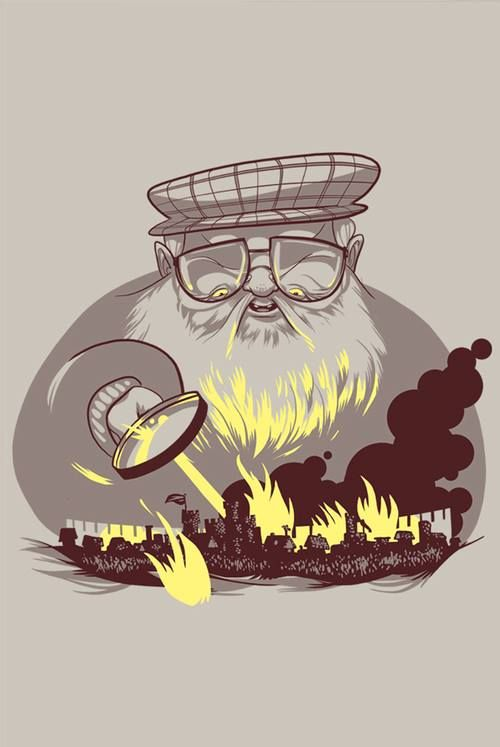

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 46.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 46.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [342]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [110]:
pd.options.display.max_rows = 100

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [308]:
train_data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

In [309]:
train_data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [310]:
test_data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [311]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [312]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [313]:
def nan_checker(data: pd.DataFrame, only_with_miss: bool = True) -> pd.DataFrame:
    """
    Функция принимающая таблицу с данными и выдающая таблицу с информацией о пропущенных значениях по каждому признаку
    """
    n_vals = data.shape[0]
    print(f"number of objs = {n_vals}")
    n_missing_values = []
    miss_percent = []
    for column in data.columns:
        n = data[column].isna().sum()
        n_missing_values.append(n)
        miss_percent.append(n / n_vals * 100)
    result = pd.DataFrame({"column_name": data.columns,
                           "n_missing_values": n_missing_values,
                           "miss_percent": miss_percent})
    if only_with_miss:
        result = result.loc[result.miss_percent != 0]
    return result.sort_values(by="miss_percent")

In [314]:
train_data.name.unique().shape #cтолбец с именем имеет абсолютно уникальные значения и никакой информации для модели не несёт

(1557,)

In [315]:
nan_data = nan_checker(train_data)
nan_data

number of objs = 1557


,column_name,n_missing_values,miss_percent
8,house,381,24.470135
1,title,840,53.949904
3,culture,1069,68.657675
4,dateOfBirth,1278,82.080925
21,age,1278,82.080925
9,spouse,1357,87.154785
18,isAliveSpouse,1357,87.154785
6,father,1535,98.587026
16,isAliveFather,1535,98.587026
7,heir,1536,98.651252


In [316]:
nan_checker(test_data)

number of objs = 389


,column_name,n_missing_values,miss_percent
8,house,46,11.825193
1,title,168,43.187661
3,culture,200,51.413882
4,dateOfBirth,235,60.411311
21,age,235,60.411311
9,spouse,313,80.462725
18,isAliveSpouse,313,80.462725
6,father,385,98.971722
16,isAliveFather,385,98.971722
5,mother,386,99.228792


Честно, не знаю как правильно действовать в данной ситуации. С одной стороны можно закопаться в данные и попытаться вычленить недостающие признаки на основе других, с другой можно дропнуть часть признаков по какой нибудь отсечке, а в оставшихся заполнить пропуски какой нибудь статистикой, можно использовать "флаг" отсутствующего значения. Согласно одному учебному видео (https://www.youtube.com/watch?v=oxmJ3mTTFfo), на практике признак дропают если процент "иcтинных пропусков" выше 5.

В данной ситуации признаки father, isAliveFather, mother, isAliveMother, heir, isAliveHeir, spouse, isAliveSpouse, Age, dateOfBirth дропну, ибо процент пропуска слишком велик.

Признак house, содержащий информацию о доме к которому принадлежит персонаж обладает небольшим  количеством пропусков, значения часто совпадают с фамилией персонажа, поэтому его можно попробовать восстановить.

Признаки title и culture, можно попровать восстановить константным значением, однако из за того что признаки категориальные, в будщем могут возникнуть проблемы с кодированием.


In [317]:
train_data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [318]:
train_data.title = train_data.title.fillna(value='unknown')
test_data.title = test_data.title.fillna(value='unknown')

In [319]:
train_data.culture = train_data.culture.fillna(value='unknown_culture')
test_data.culture = test_data.culture.fillna(value='unknown_culture')

In [320]:
train_data['title'].unique()

array(['unknown', 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', '

In [321]:
train_data['title'].value_counts()[train_data['title'].value_counts() != 1]

,count
title,
unknown,840
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9


In [322]:
# упростим признак title, мне лень проверять но кажется это даст ему больше информативности, так как в нём будет меньше уникальных значеий
strings = {
    '[L, l]ord': 'Lord',
    'Lady': 'Lady',
    '^King': 'King',
    'Prince ': 'Prince',
    'Queen': 'Queen',
    '[M, m]aster': 'Master',
    'Knight': 'Knight',
    'Khal': 'Khal'
}
for reg_ex, value in strings.items():
    train_data.loc[train_data['title'].str.contains(reg_ex), ['title']] = value
    test_data.loc[test_data['title'].str.contains(reg_ex), ['title']] = value

other_titles = train_data['title'].value_counts()[train_data['title'].value_counts() <= 3].index
for value in other_titles:
    train_data.loc[train_data['title'].str.contains(value), ['title']] = 'CastelNamed'
    test_data.loc[test_data['title'].str.contains(value), ['title']] = 'CastelNamed'

In [323]:
train_data['title'].value_counts()

,count
title,
unknown,840
Ser,306
CastelNamed,151
Lord,66
Maester,29
Archmaester,21
King,18
Septon,16
Winterfell,15


Удалим признаки у которых слишком высокое количество пропущенныз значений

In [324]:
columns_to_drop = [
    'isAliveMother',
    'mother',
    'isAliveHeir',
    'heir',
    'isAliveFather',
    'father',
    'isAliveSpouse',
    'spouse',
    'name']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [325]:
nan_checker(train_data)

number of objs = 1557


,column_name,n_missing_values,miss_percent
4,house,381,24.470135
3,dateOfBirth,1278,82.080925
12,age,1278,82.080925


Остальное заполним статистикой или простым значением.

In [326]:
train_data.house = train_data.house.fillna('unk_house')
test_data.house = test_data.house.fillna('unk_house')

In [327]:
# слегонца упростим признак house по аналогии с title
small_houses = train_data.house.value_counts()[train_data.house.value_counts() < 10].index
for house in small_houses:
    train_data.loc[train_data.house.str.contains(house), ['house']] = 'Small_house'
    test_data.loc[test_data.house.str.contains(house), ['house']] = 'Small_house'

Признаки age и date_of_birth по хорошему надо удалить,однако их значения весьма информативны для целевой переменной, поэтому попробуем и из них что нибудь выжать. В данном случае пропуски я заполню медианным значением полученным на тренировочной выборке во избежание даталика.

In [328]:
median_dob = train_data.dateOfBirth.median()
train_data.dateOfBirth = train_data.dateOfBirth.fillna(median_dob)
test_data.dateOfBirth = test_data.dateOfBirth.fillna(median_dob)

In [329]:
median_age = train_data.age.median()
train_data.age = train_data.age.fillna(median_age)
test_data.age = test_data.age.fillna(median_age)

In [330]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   object 
 1   male              1557 non-null   int64  
 2   culture           1557 non-null   object 
 3   dateOfBirth       1557 non-null   float64
 4   house             1557 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isMarried         1557 non-null   int64  
 11  isNoble           1557 non-null   int64  
 12  age               1557 non-null   float64
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usag

In [331]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             389 non-null    object 
 1   male              389 non-null    int64  
 2   culture           389 non-null    object 
 3   dateOfBirth       389 non-null    float64
 4   house             389 non-null    object 
 5   book1             389 non-null    int64  
 6   book2             389 non-null    int64  
 7   book3             389 non-null    int64  
 8   book4             389 non-null    int64  
 9   book5             389 non-null    int64  
 10  isMarried         389 non-null    int64  
 11  isNoble           389 non-null    int64  
 12  age               389 non-null    float64
 13  numDeadRelations  389 non-null    int64  
 14  popularity        389 non-null    float64
dtypes: float64(3), int64(9), object(3)
memory usage: 48.6+ KB


In [332]:
train_data.age = train_data.age.astype('int64')
train_data.dateOfBirth = train_data.dateOfBirth.astype('int64')
test_data.age = test_data.age.astype('int64')
test_data.dateOfBirth = test_data.dateOfBirth.astype('int64')

In [333]:
nan_checker(train_data)

number of objs = 1557


,column_name,n_missing_values,miss_percent


In [334]:
nan_checker(test_data)

number of objs = 389


,column_name,n_missing_values,miss_percent


Итого мы избавились от пропусков.






**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [335]:
train_data['isPopular'] = (train_data['popularity']> 0.5).astype(int)
test_data['boolDeadRelations'] = (test_data['numDeadRelations'] > 0).astype(int)

In [336]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

for key, values in cult.items():
    train_data.culture = train_data.culture.replace(values, key)
    test_data.culture = test_data.culture.replace(values, key)

Создадим новые признаки по рекомендации коллег, а именно просуммируем дату рождения с возрастом и посмотрим кто прожил до 305

In [337]:
train_data['current_date'] = train_data.age + train_data.dateOfBirth
test_data['current_date'] = test_data.age + test_data.dateOfBirth

In [338]:
train_data['is305'] = (train_data['current_date'] == 305).astype('int64')
test_data['is305'] = (test_data['current_date'] == 305).astype('int64')

In [339]:
train_data.columns

Index(['title', 'male', 'culture', 'dateOfBirth', 'house', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'popularity', 'isAlive', 'isPopular',
       'current_date', 'is305'],
      dtype='object')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [346]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   object 
 1   male              1557 non-null   int64  
 2   culture           1557 non-null   object 
 3   dateOfBirth       1557 non-null   int64  
 4   house             1557 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isMarried         1557 non-null   int64  
 11  isNoble           1557 non-null   int64  
 12  age               1557 non-null   int64  
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
 16  isPopular         1557 non-null   int64  
 17  

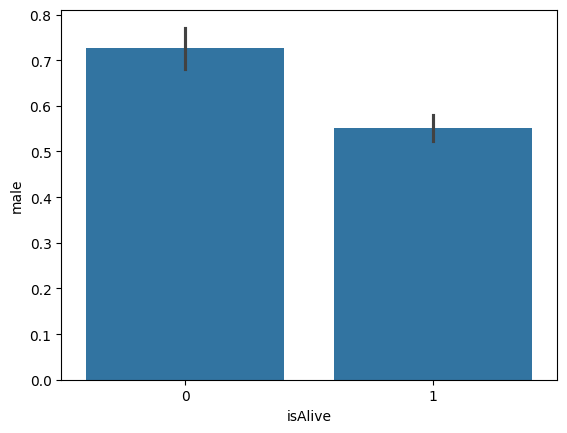

            male  isAlive
male     1.00000 -0.14829
isAlive -0.14829  1.00000


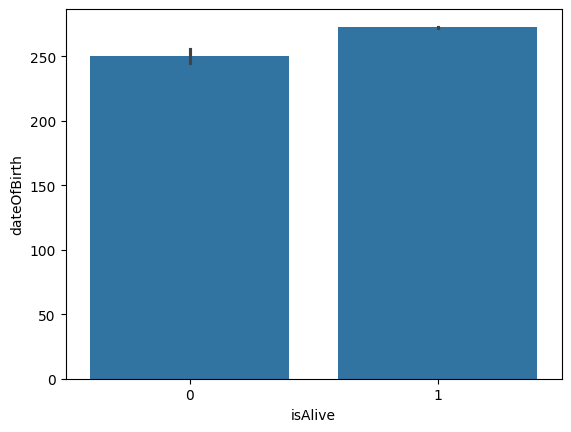

             dateOfBirth   isAlive
dateOfBirth     1.000000  0.332522
isAlive         0.332522  1.000000


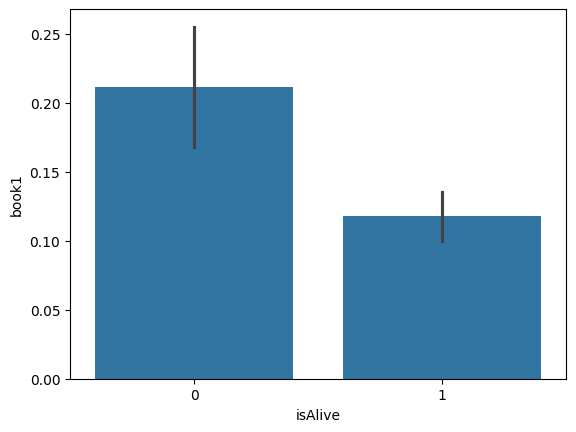

            book1   isAlive
book1    1.000000 -0.112468
isAlive -0.112468  1.000000


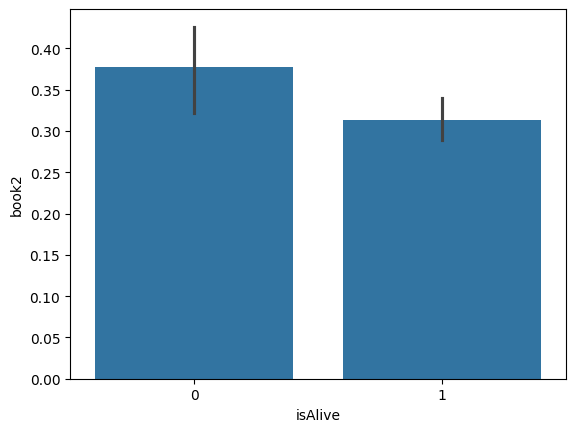

            book2   isAlive
book2    1.000000 -0.055998
isAlive -0.055998  1.000000


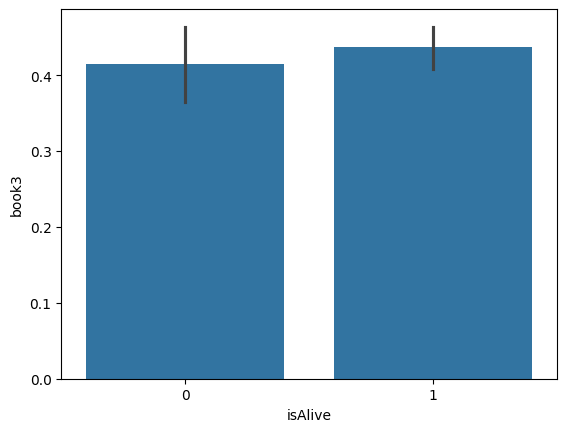

            book3   isAlive
book3    1.000000  0.018427
isAlive  0.018427  1.000000


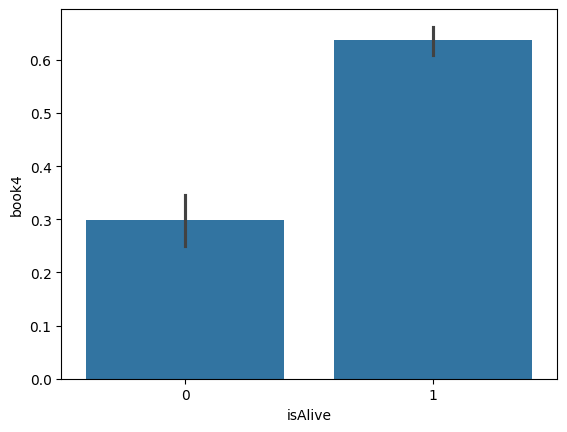

            book4   isAlive
book4    1.000000  0.284014
isAlive  0.284014  1.000000


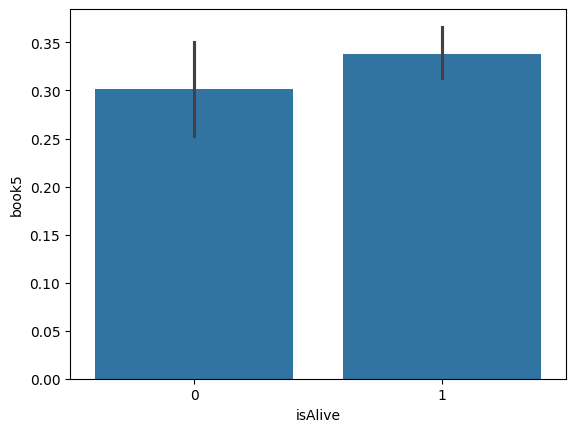

            book5   isAlive
book5    1.000000  0.032531
isAlive  0.032531  1.000000


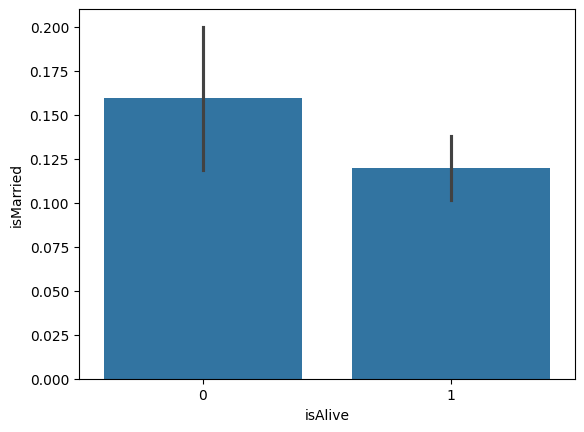

           isMarried   isAlive
isMarried   1.000000 -0.049381
isAlive    -0.049381  1.000000


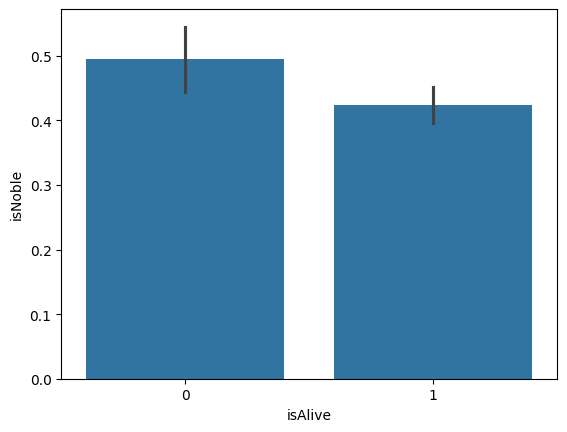

          isNoble   isAlive
isNoble  1.000000 -0.060572
isAlive -0.060572  1.000000


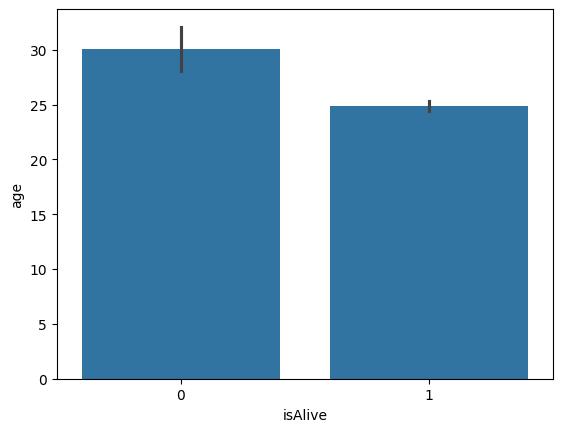

              age   isAlive
age      1.000000 -0.179331
isAlive -0.179331  1.000000


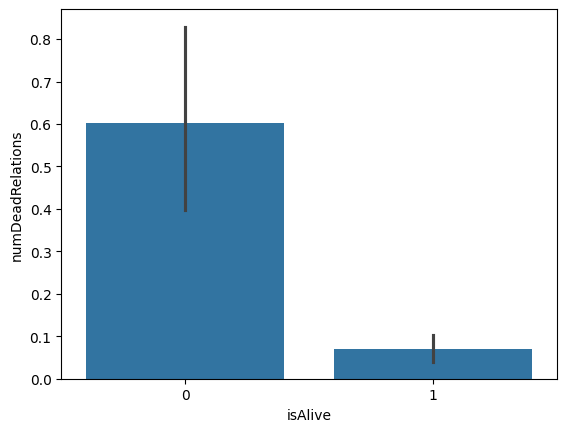

                  numDeadRelations   isAlive
numDeadRelations          1.000000 -0.198876
isAlive                  -0.198876  1.000000


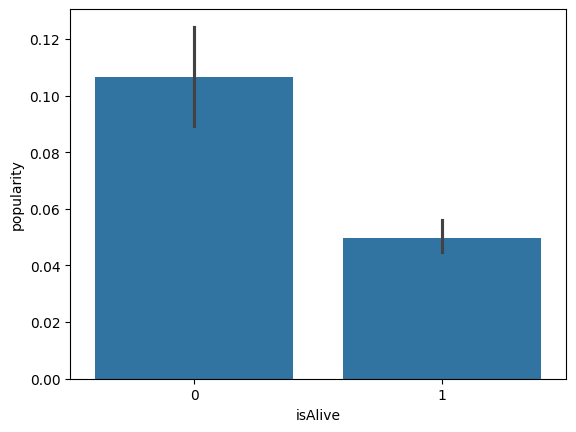

            popularity   isAlive
popularity    1.000000 -0.194187
isAlive      -0.194187  1.000000


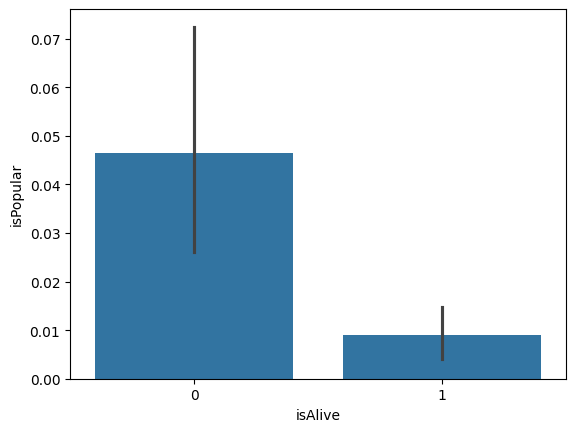

           isPopular   isAlive
isPopular   1.000000 -0.118673
isAlive    -0.118673  1.000000


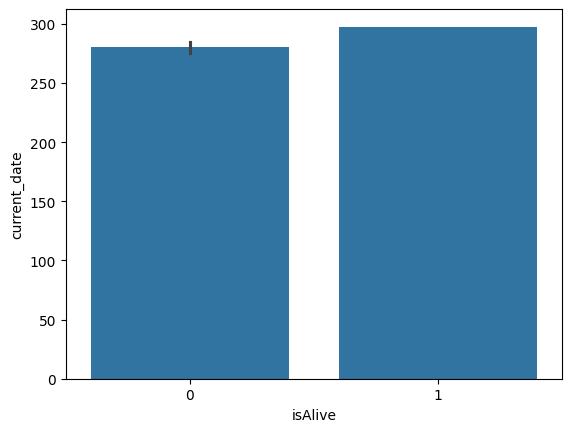

              current_date   isAlive
current_date      1.000000  0.305181
isAlive           0.305181  1.000000


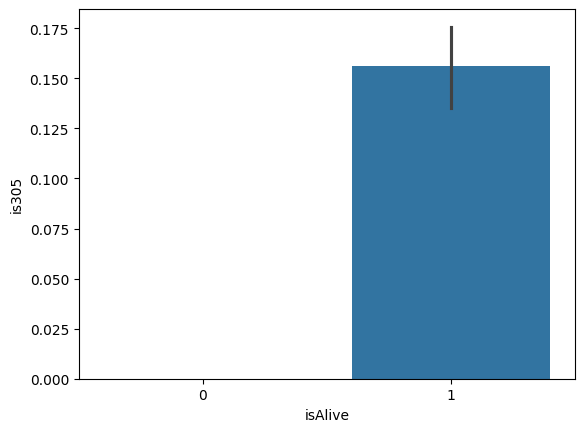

            is305   isAlive
is305    1.000000  0.198311
isAlive  0.198311  1.000000


In [348]:
num_cols = ['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isPopular', 'current_date', 'is305']
cat_cols = ['title', 'culture', 'house']
for col in num_cols:
    sns.barplot(x='isAlive', y=col, data=train_data)
    plt.show()
    correlation = train_data[[col, 'isAlive']].corr()
    print(correlation)

In [ ]:
# ненужные столбцы удалены выше
#data.drop(columns=[...], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

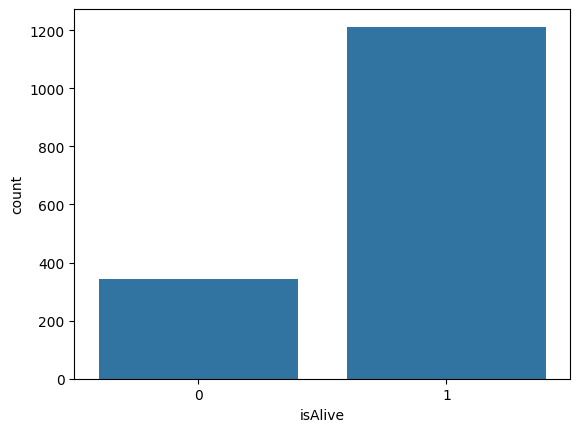

In [343]:
sns.countplot(x = 'isAlive', data = train_data)
plt.show()

Целевая переменная не сбалансирована

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)